In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
print(os.listdir("../patent project data"))

['.ipynb_checkpoints', 'decision tree.ipynb', 'dh.ipynb', 'patent documents', 'random forest-Copy1.ipynb', 'random forest.ipynb', 'sampleSubmission.csv', 'SGD classifier.ipynb', 'StemmedTfidf-Copy1.ipynb', 'test_data.csv', 'test_results.csv', 'text-classififcation', 'train_data.csv', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled4.ipynb']


In [2]:
train = pd.read_csv('../patent project data/train_data.csv')

In [3]:
train.head()

,id,first_ipc_mark_section
0,0,A
1,1,G
2,2,A
3,3,A
4,4,D


In [4]:
train['first_ipc_mark_section'].value_counts()

A    1303
G     781
C     637
B     442
H     330
E     287
F     178
D      14
Name: first_ipc_mark_section, dtype: int64

In [5]:
train['filename'] = ['../patent project data/patent documents/'] + train['id'].astype(str) + ['.txt']
train.head()

,id,first_ipc_mark_section,filename
0,0,A,../patent project data/patent documents/0.txt
1,1,G,../patent project data/patent documents/1.txt
2,2,A,../patent project data/patent documents/2.txt
3,3,A,../patent project data/patent documents/3.txt
4,4,D,../patent project data/patent documents/4.txt


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes 
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import SGDClassifier

stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])


tfidf = StemmedTfidfVectorizer(input='filename', encoding='iso8859-1', stop_words='english')
text_clf_svm = Pipeline([('tfidf', tfidf),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, max_iter=100, random_state=42))])

In [7]:
second_baseline_scores = cross_val_score(text_clf_svm, train['filename'], train['first_ipc_mark_section'], cv=5, scoring='f1_micro')
second_baseline_scores.mean()

0.7044207445578385

In [8]:
text_clf_svm.fit(train['filename'], train['first_ipc_mark_section'])

Pipeline(memory=None,
     steps=[('tfidf', StemmedTfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
            dtype=<class 'numpy.int64'>, encoding='iso8859-1',
            input='filename', lowercase=True, max_df=1.0,
            max_features=None, min_df=1, ngram_range=(1, 1), norm='l2',
            p...ty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False))])

In [9]:
test = pd.read_csv('../patent project data/test_data.csv')
test.head()

,id
0,3972
1,3973
2,3974
3,3975
4,3976


In [10]:
test['filename'] = ['../patent project data/patent documents/'] + test['id'].astype(str) + ['.txt']
test.head()

,id,filename
0,3972,../patent project data/patent documents/3972.txt
1,3973,../patent project data/patent documents/3973.txt
2,3974,../patent project data/patent documents/3974.txt
3,3975,../patent project data/patent documents/3975.txt
4,3976,../patent project data/patent documents/3976.txt


In [11]:
test['first_ipc_mark_section'] = text_clf_svm.predict(test['filename'])
test.head()

,id,filename,first_ipc_mark_section
0,3972,../patent project data/patent documents/3972.txt,G
1,3973,../patent project data/patent documents/3973.txt,H
2,3974,../patent project data/patent documents/3974.txt,A
3,3975,../patent project data/patent documents/3975.txt,A
4,3976,../patent project data/patent documents/3976.txt,C


In [12]:
test['first_ipc_mark_section'].value_counts()

A    384
G    230
C    163
B     76
H     70
E     53
F     24
Name: first_ipc_mark_section, dtype: int64

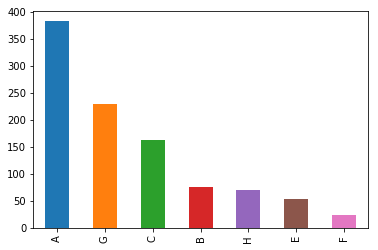

In [15]:
test['first_ipc_mark_section'].value_counts().plot.bar()

In [14]:
test[['id', 'first_ipc_mark_section']].to_csv('test_results.csv', index=False)